<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/%08BP_hv3_5(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
TensorFlow version :  2.8.2
Keras version :  2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러z오기
train_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/train_shuffled_raw_v3.mat')
test_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [ ]:
total_me = 0
total_std = 0

In [ ]:
#parameter

batch_size = 1024
epochs = 500
lrate = 0.001

# SBP

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8192      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32)                0

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 6s 11ms/step - loss: 12196.3223 - val_loss: 12128.5459
Epoch 2/500
165/165 [==============================] - 1s 9ms/step - loss: 11757.2598 - val_loss: 11692.3340
Epoch 3/500
165/165 [==============================] - 1s 9ms/step - loss: 11224.4043 - val_loss: 10341.6309
Epoch 4/500
165/165 [==============================] - 1s 9ms/step - loss: 10476.7861 - val_loss: 9901.2900
Epoch 5/500
165/165 [==============================] - 1s 9ms/step - loss: 9615.9062 - val_loss: 10339.5938
Epoch 6/500
165/165 [==============================] - 2s 9ms/step - loss: 8682.6230 - val_loss: 7640.6787
Epoch 7/500
165/165 [==============================] - 1s 9ms/step - loss: 7675.4971 - val_loss: 6220.8086
Epoch 8/500
165/165 [==============================] - 1s 9ms/step - loss: 6672.0298 - val_loss: 5865.3398
Epoch 9/500
165/165 [==============================] - 1s 9ms/step - loss: 5696.1313 - val_loss: 5087.9263
Epoch 10/500
165/165 [======

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -4.093482315494199 
MAE:  8.136088614800926 
SD:  9.733941566565136


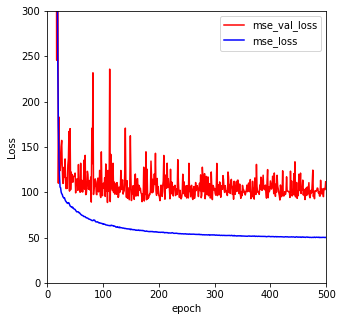

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                8192      
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_11 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 32)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 4s 10ms/step - loss: 12387.7168 - val_loss: 12425.0371
Epoch 2/500
165/165 [==============================] - 1s 9ms/step - loss: 12087.4609 - val_loss: 11720.8203
Epoch 3/500
165/165 [==============================] - 1s 9ms/step - loss: 11694.0264 - val_loss: 11101.0205
Epoch 4/500
165/165 [==============================] - 1s 9ms/step - loss: 11131.7920 - val_loss: 10390.3057
Epoch 5/500
165/165 [==============================] - 1s 9ms/step - loss: 10501.2852 - val_loss: 9269.8975
Epoch 6/500
165/165 [==============================] - 1s 8ms/step - loss: 9803.1504 - val_loss: 10308.2568
Epoch 7/500
165/165 [==============================] - 1s 9ms/step - loss: 9050.5557 - val_loss: 8035.0488
Epoch 8/500
165/165 [==============================] - 1s 9ms/step - loss: 8262.5830 - val_loss: 7577.6816
Epoch 9/500
165/165 [==============================] - 1s 9ms/step - loss: 7462.2183 - val_loss: 7151.0356
Epoch 10/500
165/165 [====

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -2.134633858017672 
MAE:  7.850791065257864 
SD:  10.287310522961862


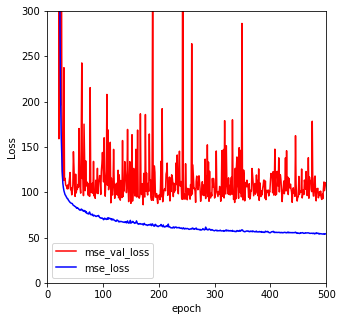

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                8192      
                                                                 
 batch_normalization_20 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_21 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 32)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 4s 10ms/step - loss: 12500.3311 - val_loss: 12328.8770
Epoch 2/500
165/165 [==============================] - 1s 9ms/step - loss: 12273.5732 - val_loss: 12146.4297
Epoch 3/500
165/165 [==============================] - 1s 9ms/step - loss: 12069.8506 - val_loss: 12089.1455
Epoch 4/500
165/165 [==============================] - 2s 9ms/step - loss: 11796.1025 - val_loss: 11648.6416
Epoch 5/500
165/165 [==============================] - 2s 9ms/step - loss: 11441.1680 - val_loss: 11656.5068
Epoch 6/500
165/165 [==============================] - 1s 9ms/step - loss: 11028.2119 - val_loss: 11338.6953
Epoch 7/500
165/165 [==============================] - 1s 9ms/step - loss: 10524.0947 - val_loss: 9125.1357
Epoch 8/500
165/165 [==============================] - 1s 9ms/step - loss: 9927.5703 - val_loss: 9606.6445
Epoch 9/500
165/165 [==============================] - 1s 9ms/step - loss: 9269.9932 - val_loss: 8829.9131
Epoch 10/500
165/165 [=

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.8871369887371072 
MAE:  7.7521725069462875 
SD:  10.216593860207892


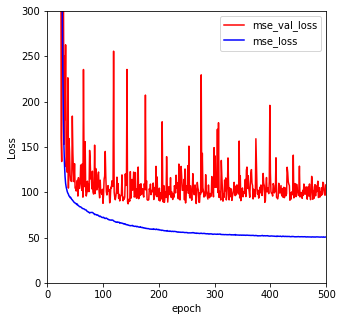

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -1.4469930615915878 
Ensemble_std:  10.079281983244963


# DBP

In [ ]:
total_me = 0
total_std = 0

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                8192      
                                                                 
 batch_normalization_30 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_31 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_31 (Activation)  (None, 32)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 4s 11ms/step - loss: 3751.5754 - val_loss: 3714.9958
Epoch 2/500
165/165 [==============================] - 1s 9ms/step - loss: 3562.4924 - val_loss: 3321.5205
Epoch 3/500
165/165 [==============================] - 1s 9ms/step - loss: 3335.2166 - val_loss: 2935.7771
Epoch 4/500
165/165 [==============================] - 1s 9ms/step - loss: 3035.1787 - val_loss: 2566.8989
Epoch 5/500
165/165 [==============================] - 1s 9ms/step - loss: 2684.6409 - val_loss: 2100.3992
Epoch 6/500
165/165 [==============================] - 1s 9ms/step - loss: 2307.1721 - val_loss: 1804.6462
Epoch 7/500
165/165 [==============================] - 1s 9ms/step - loss: 1923.0443 - val_loss: 1659.3524
Epoch 8/500
165/165 [==============================] - 1s 9ms/step - loss: 1557.5509 - val_loss: 1421.0928
Epoch 9/500
165/165 [==============================] - 1s 9ms/step - loss: 1225.3591 - val_loss: 1025.1772
Epoch 10/500
165/165 [==============

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.3622258055319973 
MAE:  4.640890229466306 
SD:  6.2270223052128255


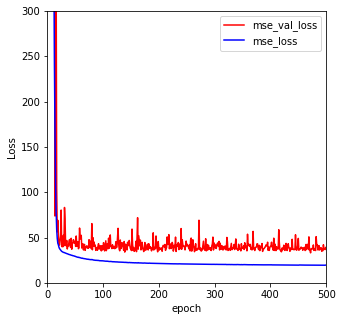

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                8192      
                                                                 
 batch_normalization_40 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 activation_40 (Activation)  (None, 64)                0         
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_41 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_41 (Activation)  (None, 32)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 4s 10ms/step - loss: 3767.8447 - val_loss: 3717.7939
Epoch 2/500
165/165 [==============================] - 1s 8ms/step - loss: 3595.1685 - val_loss: 3492.3108
Epoch 3/500
165/165 [==============================] - 1s 9ms/step - loss: 3375.9431 - val_loss: 3340.0813
Epoch 4/500
165/165 [==============================] - 1s 9ms/step - loss: 3095.5967 - val_loss: 3072.1995
Epoch 5/500
165/165 [==============================] - 1s 9ms/step - loss: 2717.1350 - val_loss: 1952.2787
Epoch 6/500
165/165 [==============================] - 1s 9ms/step - loss: 2325.8914 - val_loss: 2283.1528
Epoch 7/500
165/165 [==============================] - 1s 9ms/step - loss: 1919.0317 - val_loss: 1377.6621
Epoch 8/500
165/165 [==============================] - 1s 8ms/step - loss: 1537.6375 - val_loss: 2254.8997
Epoch 9/500
165/165 [==============================] - 1s 9ms/step - loss: 1200.4653 - val_loss: 804.3814
Epoch 10/500
165/165 [===============

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -2.8481154211553297 
MAE:  5.19202535105797 
SD:  6.028239517059023


In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -1.5570994055335483 
Ensemble_std:  6.041791431733746

Ensemble_me:  -1.5570994055335483 
Ensemble_std:  6.041791431733746
